<a href="https://colab.research.google.com/github/mlngyu/2-2_3team_MDP/blob/main/mdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 8.9 MB/s eta 0:00:00


In [ ]:
%pip install rembg

In [ ]:
import ultralytics
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
image_path = '/content/drive/Shareddrives/mdp/silvanian/실바니안/'

In [ ]:
import rembg

In [ ]:

%mkdir resultfile
%cd resultfile

/content/resultfile


In [ ]:
%cd ..
%cd content

/content
[Errno 2] No such file or directory: 'content'
/content


In [ ]:
rows,cols = 640,640
a1 = [[            [100, 100],
                  [rows-100, 100],
                  [100, cols-100],
                  [rows-100,cols-100]],

                  [[0, 0],
                  [rows, 200],
                  [0,cols],
                  [rows,cols-200]]]

a2 = [[            [100, 100],
                  [rows-100, 100],
                  [100, cols-100],
                  [rows-100,cols-100]],

                  [[0, 200],
                  [rows, 0],
                  [0,cols-200],
                  [rows,cols]]]
a = a1 + a2

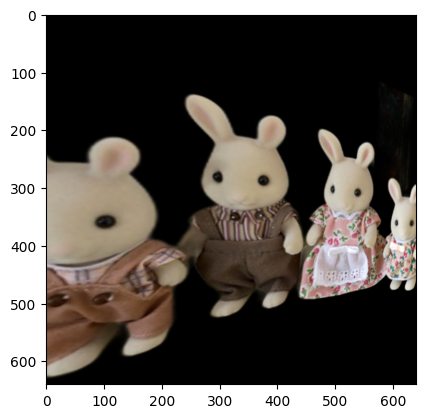

In [ ]:
import random
import os
img_list = os.listdir(image_path)
# img_list_jpg = [img for img in img_list if img.endswith(".jpg")]
# print(img_list)
for picnumber in range(100):
  img_list[picnumber] = image_path + img_list[picnumber]
  image_bgr = cv2.imread(img_list[picnumber])
  image_bgr = rembg.remove(image_bgr)
  image_gray = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)
  image_gray = cv2.resize(image_gray,(640,640))
  rannum = random.randint(0,2)
  if rannum == 1: rannum = 0
  pts1 = np.float32([a[rannum][0],
                    a[rannum][1],
                    a[rannum][2],
                    a[rannum][3]])

  pts2 = np.float32([a[rannum+1][0],
                    a[rannum+1][1],
                    a[rannum+1][2],
                    a[rannum+1][3]])
  M = cv2.getPerspectiveTransform(pts1, pts2)
  dst = cv2.warpPerspective(image_gray, M, (cols, rows))
  cv2.imwrite("/content/resultfile/"+str(picnumber)+'.jpg', dst)